In [1]:
import numpy as np
import matplotlib.pyplot as plt
MACHINE_EPS = np.finfo(float).eps  # Machine epsilon value for the floating-point 

In [2]:
def f(x):
    f1 = 3*x[0]-np.cos(x[1]*x[2])-3/2
    f2 = 4*(x[0])**2 - 625*(x[1])**2 + 2*x[2] - 1
    f3 = 20*x[2]+ np.exp(-x[0]*x[1]) + 9 

    return np.array([f1,f2,f3])

In [3]:
def df(x):
    return np.array([[3, x[2]*np.sin(x[1]*x[2]), x[1]*np.sin(x[1]*x[2])],
                     [8*x[0], -1250*x[1], 2],
                     [-x[1]*np.exp(-x[0]*x[1]), -x[0]*np.exp(-x[0]*x[1]), 20]])

In [4]:
def newton(x0, f, df, ITERATIONS=20, min_tol = MACHINE_EPS):
    """
    Approximates a root of the function f using Newton's method.
    f can be a fucntion from R^n->R.

    Parameters:
    - x0 : array_like
        Initial guess for the root.
    - f : callable
        The function whose root is sought.
    - df : callable
        The derivative of the function `f`.
    - ITERATIONS : int, optional
        Number of iterations (default is 20).

    Returns:
    - xn : array_like
        Approximation of the root.
    - error_lst : list
        List containing the error (norm of f(xn)) at each iteration.
    """

    xn = x0.copy()  
    f_val = f(xn)  
    error_lst = [] 

    for i in range(ITERATIONS):
        # Compute the Newton-Raphson update step using np.linalg.solve
        b = np.linalg.solve(df(xn), f_val)
        xn -= b  
        f_val = f(xn)
        error = np.linalg.norm(f_val) 
        error_lst.append(error)  
        
        if error_lst[-1] < min_tol:  
            break  

    return xn, np.array(error_lst )


In [5]:
x, errors = newton([1,1,1], f, df, ITERATIONS=40)

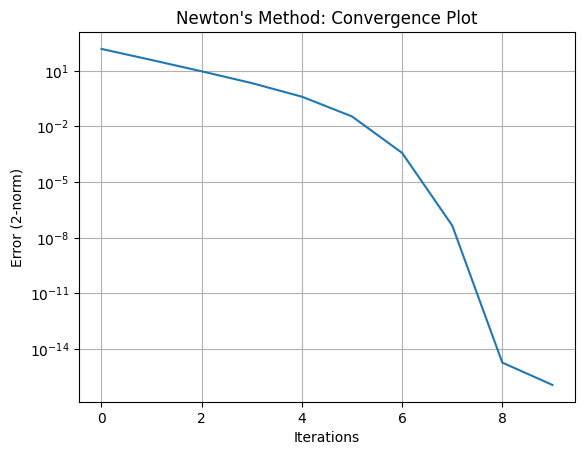

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(errors)

ax.set( yscale = 'log', title ='Newton\'s Method: Convergence Plot', xlabel = 'Iterations', ylabel = 'Error (2-norm)' )
ax.grid(which ='both')

In [31]:
# TODO
# fix linear style

array([1, 2, 3, 4, 5, 6, 7, 8, 9])